[[Model]]
    Model(expcloud)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 47
    # data points      = 5
    # variables        = 3
    chi-square         = 2.2868e-09
    reduced chi-square = 1.1434e-09
    Akaike info crit   = -101.527654
    Bayesian info crit = -102.699340
    R-squared          = 0.97784423
[[Variables]]
    s0:  3.6068e-10 +/- 13.7224255 (3804563336767.15%) (init = 7e-05)
    T:   4.2684e-06 +/- 1.7697e-06 (41.46%) (init = 1.2e-05)
    to:  0.00201551 +/- 0.00433970 (215.31%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(T, to)  = +0.9632
    C(s0, to) = +0.9319
    C(s0, T)  = +0.8581


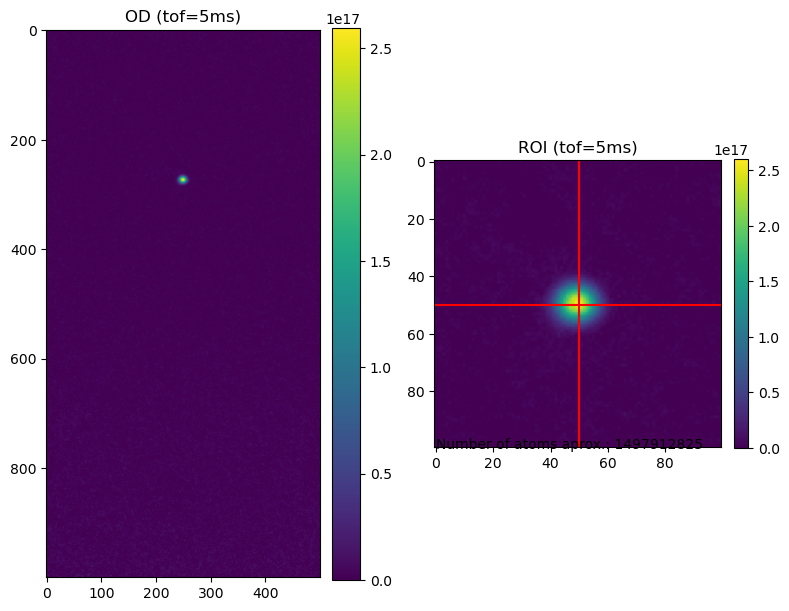

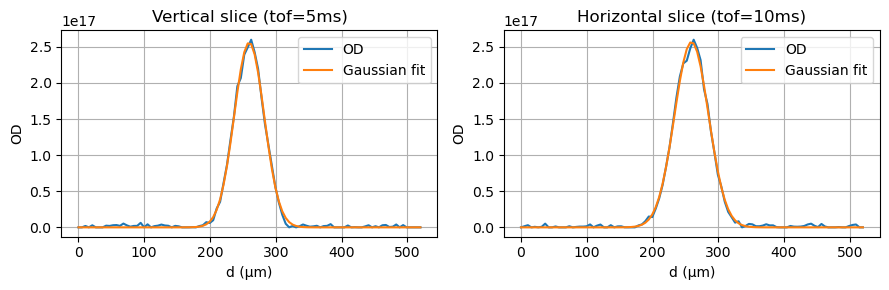

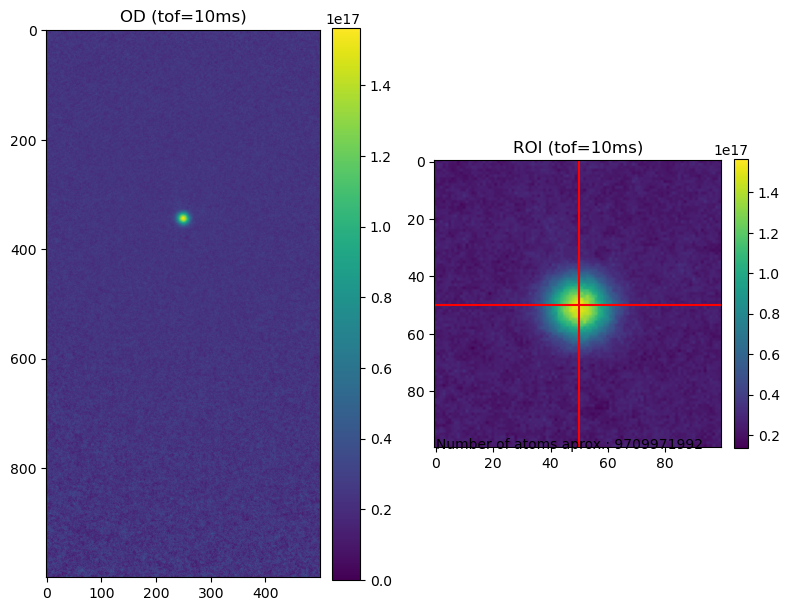

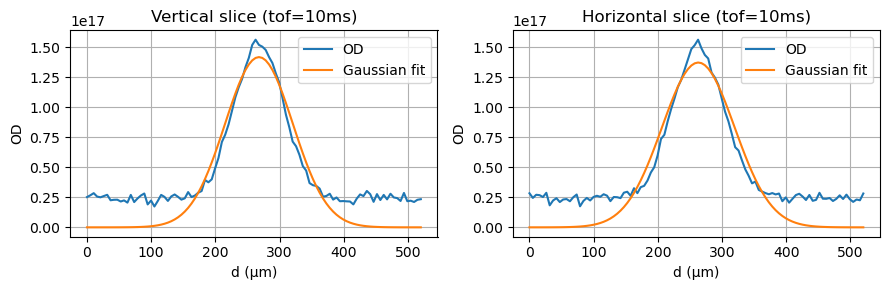

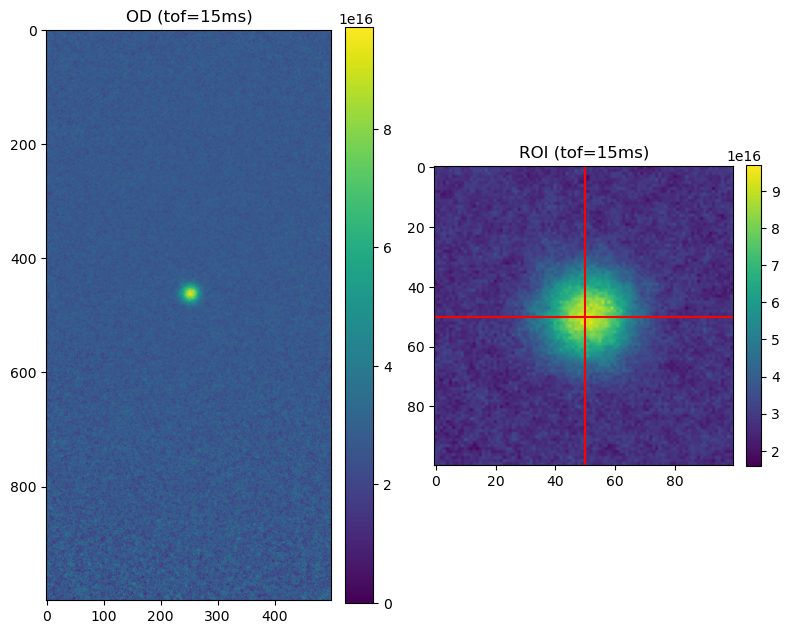

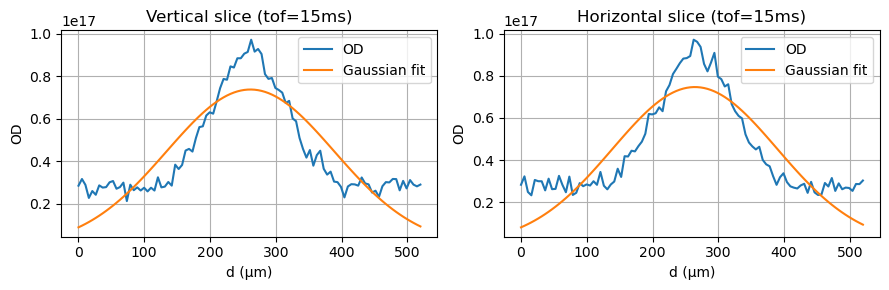

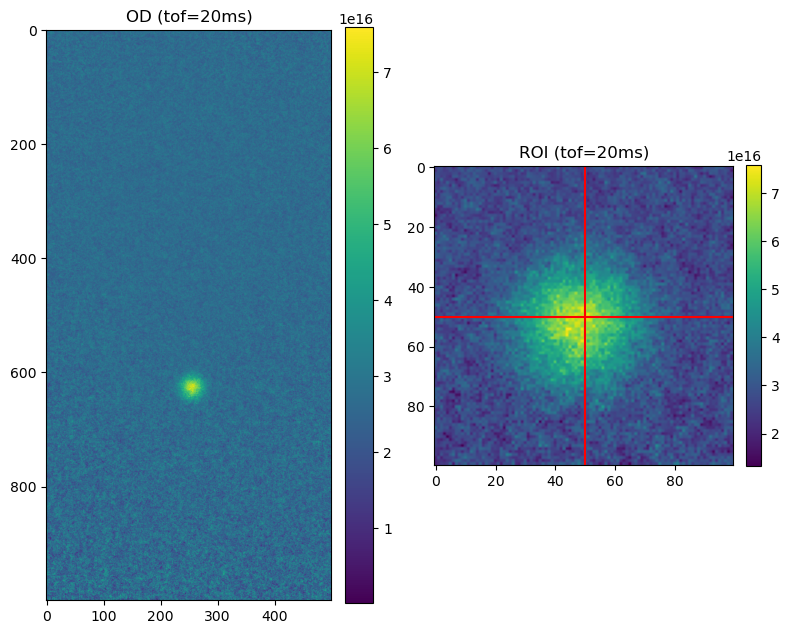

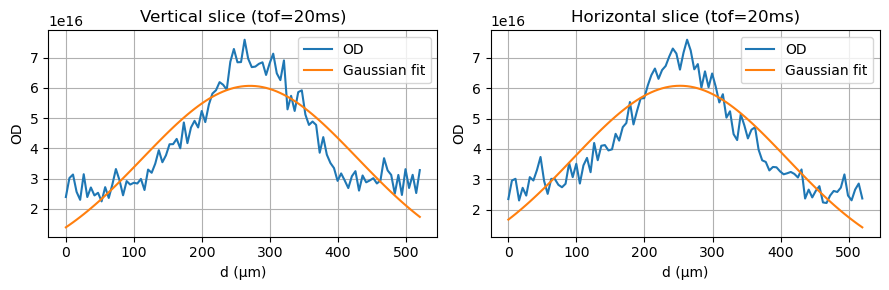

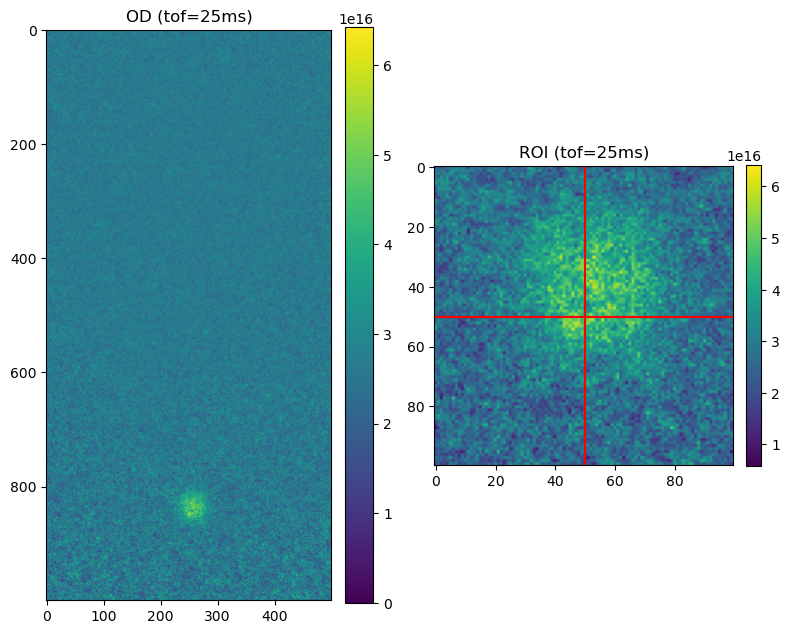

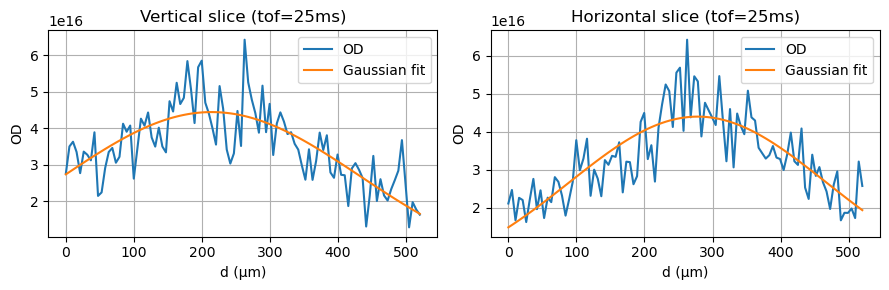

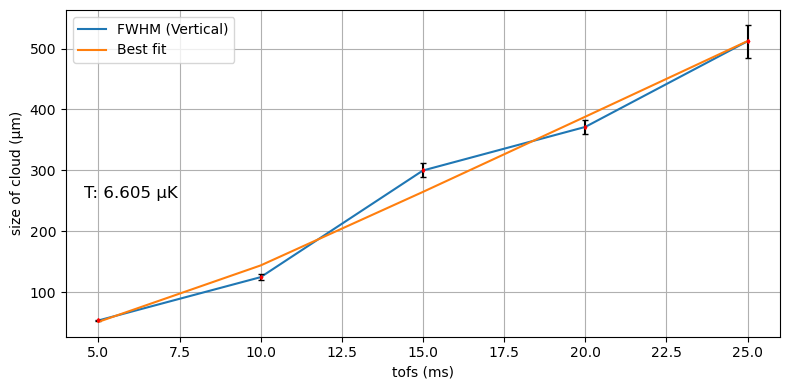

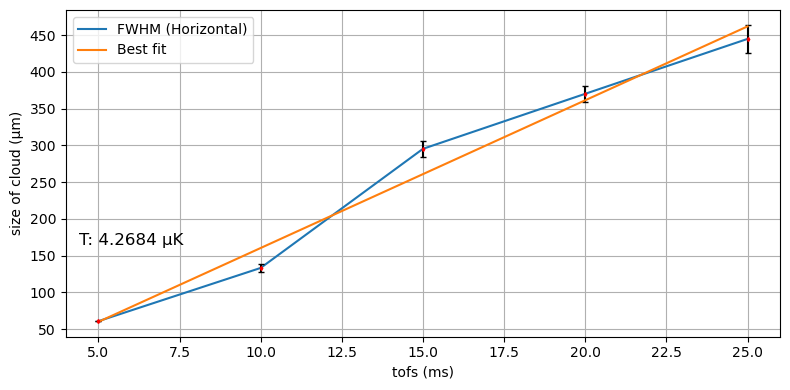

In [694]:
# import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import GaussianModel
from lmfit import Model
from PIL import Image 
imgscale = 2**16 / 2.7

def gaussianfit(x,y):
    mod=GaussianModel()
    plt.plot(x,y,label='OD')
    plt.grid(1)
    pars=mod.guess(y, x=x)
    out=mod.fit(y, pars, x=x)
    plt.plot(x,out.best_fit, label='Gaussian fit')
    plt.legend()
    return out

def absimage(im1,im2,im3,im4,im5,im6,im7,im8,im9):
    r1=np.clip(im2-im3,1e-5,None)
    r2=np.clip(im1-im3,1e-5,None)
    OD1=np.log(r1/r2)
    OD1=(np.clip(OD1, 0, 5))/s
    r1=np.clip(im5-im6,1e-5,None)
    r2=np.clip(im4-im6,1e-5,None)
    OD2=np.log(r1/r2)
    OD2=(np.clip(OD2, 0, 5))/s
    r1=np.clip(im8-im9,1e-5,None)
    r2=np.clip(im7-im9,1e-5,None)
    OD3=np.log(r1/r2)
    OD3=(np.clip(OD3, 0, 5))/s
    return (OD1+OD2+OD3)/3

def rofi(n):
    x,y=np.unravel_index(np.argmax(n), n.shape)
    roi=n[max(x-round(sroi/2),0):min(x+round(sroi/2),n.shape[0]),max(y-round(sroi/2),0):min(y+round(sroi/2),n.shape[1])]
    hspos,vspos=np.unravel_index(np.argmax(roi), roi.shape)
    vs=roi[:,vspos]
    hs=roi[hspos,:]
    return roi,vs,vspos,hs,hspos

l=460.8e-9
#l=689e-9
hp=6.5e-6
wp=6.5e-6
mg=1.25
s=(3*l*l)/(2*np.pi)
fwhmv=[]
fwhmv_err=[]
fwhmh=[]
fwhmh_err=[]
tofs=np.array([0.005,0.010,0.015,0.020,0.025])
sroi=100
hi=1000
wi=500

with open("2024-07-25_500x1000_idx1_Clock_Measurements(p=TOF,)#0.005_7394585310.bin","rb") as dt1: im1=np.reshape(np.frombuffer(dt1.read(),dtype=np.uint16),(500,1000))
with open("2024-07-25_500x1000_idx1_Clock_Measurements(p=TOF,)#0.005_7394585314.bin","rb") as dt2: im2=np.reshape(np.frombuffer(dt2.read(),dtype=np.uint16),(500,1000))
with open("2024-07-25_500x1000_idx1_Clock_Measurements(p=TOF,)#0.005_7394585316.bin","rb") as dt3: im3=np.reshape(np.frombuffer(dt3.read(),dtype=np.uint16),(500,1000))
with open("2024-07-25_500x1000_idx1_Clock_Measurements(p=TOF,)#0.01_7394585320.bin","rb") as dt4: im4=np.reshape(np.frombuffer(dt4.read(),dtype=np.uint16),(500,1000))
with open("2024-07-25_500x1000_idx1_Clock_Measurements(p=TOF,)#0.01_7394585322.bin","rb") as dt5: im5=np.reshape(np.frombuffer(dt5.read(),dtype=np.uint16),(500,1000))
with open("2024-07-25_500x1000_idx1_Clock_Measurements(p=TOF,)#0.01_7394585325.bin","rb") as dt6: im6=np.reshape(np.frombuffer(dt6.read(),dtype=np.uint16),(500,1000))
with open("2024-07-25_500x1000_idx1_Clock_Measurements(p=TOF,)#0.015_7394585329.bin","rb") as dt7: im7=np.reshape(np.frombuffer(dt7.read(),dtype=np.uint16),(500,1000))
with open("2024-07-25_500x1000_idx1_Clock_Measurements(p=TOF,)#0.015_7394585332.bin","rb") as dt8: im8=np.reshape(np.frombuffer(dt8.read(),dtype=np.uint16),(500,1000))
with open("2024-07-25_500x1000_idx1_Clock_Measurements(p=TOF,)#0.015_7394585334.bin","rb") as dt9: im9=np.reshape(np.frombuffer(dt9.read(),dtype=np.uint16),(500,1000))
with open("2024-07-25_500x1000_idx1_Clock_Measurements(p=TOF,)#0.02_7394585339.bin","rb") as dt10: im10=np.reshape(np.frombuffer(dt10.read(),dtype=np.uint16),(500,1000))
with open("2024-07-25_500x1000_idx1_Clock_Measurements(p=TOF,)#0.02_7394585341.bin","rb") as dt11: im11=np.reshape(np.frombuffer(dt11.read(),dtype=np.uint16),(500,1000))
with open("2024-07-25_500x1000_idx1_Clock_Measurements(p=TOF,)#0.02_7394585343.bin","rb") as dt12: im12=np.reshape(np.frombuffer(dt12.read(),dtype=np.uint16),(500,1000))
with open("2024-07-25_500x1000_idx1_Clock_Measurements(p=TOF,)#0.025_7394585347.bin","rb") as dt13: im13=np.reshape(np.frombuffer(dt13.read(),dtype=np.uint16),(500,1000))
with open("2024-07-25_500x1000_idx1_Clock_Measurements(p=TOF,)#0.025_7394585350.bin","rb") as dt14: im14=np.reshape(np.frombuffer(dt14.read(),dtype=np.uint16),(500,1000))
with open("2024-07-25_500x1000_idx1_Clock_Measurements(p=TOF,)#0.025_7394585352.bin","rb") as dt15: im15=np.reshape(np.frombuffer(dt15.read(),dtype=np.uint16),(500,1000))

#im1 = im1/imgscale - 0.1
#im2 = im2/imgscale - 0.1
#im3 = im3/imgscale - 0.1
#im4 = im1/imgscale - 0.1
#im5 = im2/imgscale - 0.1
#im6 = im3/imgscale - 0.1
im1=im1.astype(np.float64)/s
im2=im2.astype(np.float64)/s
im3=im3.astype(np.float64)/s
#im1 = im1/imgscale - 0.1
#im2 = im2/imgscale - 0.1
#im3 = im3/imgscale - 0.1
im4=im4.astype(np.float64)/s
im5=im5.astype(np.float64)/s
im6=im6.astype(np.float64)/s
im7=im7.astype(np.float64)/s
im8=im8.astype(np.float64)/s
im9=im9.astype(np.float64)/s
im10=im10.astype(np.float64)/s
im11=im11.astype(np.float64)/s
im12=im12.astype(np.float64)/s
im13=im13.astype(np.float64)/s
im14=im14.astype(np.float64)/s
im15=im15.astype(np.float64)/s

OD1=(im1+im2+im3)/3
OD2=(im4+im5+im6)/3
OD3=(im7+im8+im9)/3
OD4=(im10+im11+im12)/3
OD5=(im13+im14+im15)/3
OD1=np.rot90(OD1,k=3)
OD1=np.maximum(OD1-np.mean(OD1[800:850,0:50]),0)
OD2=np.rot90(OD2,k=3)
OD3=np.rot90(OD3,k=3)
OD4=np.rot90(OD4,k=3)
OD5=np.rot90(OD5,k=3)

#5ms
fig=plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(OD1)
plt.title('OD (tof=5ms)')
plt.colorbar(fraction=0.088, pad=0.04)
plt.subplot(1,2,2)
roi,vs,vspos,hs,hspos=rofi(OD1)
plt.imshow(roi)
plt.axvline(vspos,color='r')
plt.axhline(hspos,color='r')
plt.title('ROI (tof=5ms)')
plt.colorbar(fraction=0.046, pad=0.04)
Na=round(np.sum(roi,dtype=np.float64)*hp*wp/mg)
plt.text(0,100,f"Number of atoms aprox.: {Na}")
plt.tight_layout()
fig=plt.figure(figsize=(9,3))
x=np.linspace(0,len(vs)*hp,len(vs))*1e6/mg
plt.subplot(1,2,1)
out=gaussianfit(x,vs)
plt.title('Vertical slice (tof=5ms)')
plt.xlabel('d (μm)')
plt.ylabel('OD')
fwhmv.append(out.params['fwhm'].value)
fwhmv_err.append(out.params['fwhm'].stderr)
x=np.linspace(0,len(hs)*wp,len(hs))*1e6/mg
plt.subplot(1,2,2)
out=gaussianfit(x,hs)
plt.title('Horizontal slice (tof=10ms)')
plt.xlabel('d (μm)')
plt.ylabel('OD')
fwhmh.append(out.params['fwhm'].value)
fwhmh_err.append(out.params['fwhm'].stderr)
plt.tight_layout()

#10ms
fig=plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(OD2)
plt.title('OD (tof=10ms)')
plt.colorbar(fraction=0.088, pad=0.04)
plt.subplot(1,2,2)
roi,vs,vspos,hs,hspos=rofi(OD2)
plt.imshow(roi)
plt.axvline(vspos,color='r')
plt.axhline(hspos,color='r')
plt.title('ROI (tof=10ms)')
plt.colorbar(fraction=0.046, pad=0.04)
Na=round(np.sum(roi,dtype=np.float64)*hp*wp/mg)
plt.text(0,100,f"Number of atoms aprox.: {Na}")
plt.tight_layout()
fig=plt.figure(figsize=(9,3))
x=np.linspace(0,len(vs)*hp,len(vs))*1e6/mg
plt.subplot(1,2,1)
out=gaussianfit(x,vs)
plt.title('Vertical slice (tof=10ms)')
plt.xlabel('d (μm)')
plt.ylabel('OD')
fwhmv.append(out.params['fwhm'].value)
fwhmv_err.append(out.params['fwhm'].stderr)
x=np.linspace(0,len(hs)*wp,len(hs))*1e6/mg
plt.subplot(1,2,2)
out=gaussianfit(x,hs)
plt.title('Horizontal slice (tof=10ms)')
plt.xlabel('d (μm)')
plt.ylabel('OD')
fwhmh.append(out.params['fwhm'].value)
fwhmh_err.append(out.params['fwhm'].stderr)
plt.tight_layout()

#15ms
fig=plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(OD3)
plt.title('OD (tof=15ms)')
plt.colorbar(fraction=0.088, pad=0.04)
plt.subplot(1,2,2)
roi,vs,vspos,hs,hspos=rofi(OD3)
plt.imshow(roi)
plt.axvline(vspos,color='r')
plt.axhline(hspos,color='r')
plt.title('ROI (tof=15ms)')
plt.colorbar(fraction=0.046, pad=0.04)
plt.tight_layout()
fig=plt.figure(figsize=(9,3))
x=np.linspace(0,len(vs)*hp,len(vs))*1e6/mg
plt.subplot(1,2,1)
out=gaussianfit(x,vs)
plt.title('Vertical slice (tof=15ms)')
plt.xlabel('d (μm)')
plt.ylabel('OD')
fwhmv.append(out.params['fwhm'].value)
fwhmv_err.append(out.params['fwhm'].stderr)
x=np.linspace(0,len(hs)*wp,len(hs))*1e6/mg
plt.subplot(1,2,2)
out=gaussianfit(x,hs)
plt.title('Horizontal slice (tof=15ms)')
plt.xlabel('d (μm)')
plt.ylabel('OD')
fwhmh.append(out.params['fwhm'].value)
fwhmh_err.append(out.params['fwhm'].stderr)
plt.tight_layout()

#20ms
fig=plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(OD4)
plt.title('OD (tof=20ms)')
plt.colorbar(fraction=0.088, pad=0.04)
plt.subplot(1,2,2)
roi,vs,vspos,hs,hspos=rofi(OD4[round(hi/4):round(3*hi/4),round(wi/4):round(3*wi/4)])
plt.imshow(roi)
plt.axvline(vspos,color='r')
plt.axhline(hspos,color='r')
plt.title('ROI (tof=20ms)')
plt.colorbar(fraction=0.046, pad=0.04)
plt.tight_layout()
fig=plt.figure(figsize=(9,3))
x=np.linspace(0,len(vs)*hp,len(vs))*1e6/mg
plt.subplot(1,2,1)
out=gaussianfit(x,vs)
plt.title('Vertical slice (tof=20ms)')
plt.xlabel('d (μm)')
plt.ylabel('OD')
fwhmv.append(out.params['fwhm'].value)
fwhmv_err.append(out.params['fwhm'].stderr)
x=np.linspace(0,len(hs)*wp,len(hs))*1e6/mg
plt.subplot(1,2,2)
out=gaussianfit(x,hs)
plt.title('Horizontal slice (tof=20ms)')
plt.xlabel('d (μm)')
plt.ylabel('OD')
fwhmh.append(out.params['fwhm'].value)
fwhmh_err.append(out.params['fwhm'].stderr)
plt.tight_layout()

#25ms
fig=plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(OD5)
plt.title('OD (tof=25ms)')
plt.colorbar(fraction=0.088, pad=0.04)
plt.subplot(1,2,2)
roi,vs,vspos,hs,hspos=rofi(OD5[round(hi/2):round(9*hi/10),round(wi/4):round(3*wi/4)])
plt.imshow(roi)
plt.axvline(vspos,color='r')
plt.axhline(hspos,color='r')
plt.title('ROI (tof=25ms)')
plt.colorbar(fraction=0.046, pad=0.04)
plt.tight_layout()
fig=plt.figure(figsize=(9,3))
x=np.linspace(0,len(vs)*hp,len(vs))*1e6/mg
plt.subplot(1,2,1)
out=gaussianfit(x,vs)
plt.title('Vertical slice (tof=25ms)')
plt.xlabel('d (μm)')
plt.ylabel('OD')
fwhmv.append(out.params['fwhm'].value)
fwhmv_err.append(out.params['fwhm'].stderr)
x=np.linspace(0,len(hs)*wp,len(hs))*1e6/mg
plt.subplot(1,2,2)
out=gaussianfit(x,hs)
plt.title('Horizontal slice (tof=25ms)')
plt.xlabel('d (μm)')
plt.ylabel('OD')
fwhmh.append(out.params['fwhm'].value)
fwhmh_err.append(out.params['fwhm'].stderr)
plt.tight_layout()

#FWHM
def expcloud(tofs,s0,T,to): return np.sqrt(s0*s0+(kb*T*(tofs-to)*(tofs-to))/msr88)
kb=1.380649e-23
msr88=1.459706901e-25
s0=70e-6
T=12e-6
to=0
fwhmv=(np.array(fwhmv))/1e6
fwhmv_err=(np.array(fwhmv_err))/1e6
fwhmh=(np.array(fwhmh))/1e6
fwhmh_err=(np.array(fwhmh_err))/1e6

fig=plt.figure(figsize=(8,4))
mod=Model(expcloud)
params=mod.make_params()
params['s0'].set(value=70e-6,min=0,max=600e-6)
params['T'].set(value=12e-6,min=0,max=100e-6)
params['to'].set(value=0,min=-15e-3,max=15e-3)
plt.plot(tofs*1e3,fwhmv*1e6,label='FWHM (Vertical)')
plt.errorbar(tofs*1e3,fwhmv*1e6,yerr=fwhmv_err*1e6,fmt='rd',ecolor='black',ms=2,capsize=2)
out=mod.fit(fwhmv,tofs=tofs,params=params)
plt.plot(tofs*1e3,out.best_fit*1e6,label='Best fit')
plt.legend()
plt.xlabel('tofs (ms)')
plt.ylabel('size of cloud (μm)')
plt.grid(1)
T1=round(out.params['T'].value*1e6,4)
Tx1=f"T: {T1} μK"
plt.text(6,250,Tx1,fontsize=12,ha='center',va='bottom')
plt.tight_layout()

fig=plt.figure(figsize=(8,4))
mod=Model(expcloud)
params=mod.make_params()
params['s0'].set(value=70e-6,min=0,max=600e-6)
params['T'].set(value=12e-6,min=0,max=100e-6)
params['to'].set(value=0,min=-15e-3,max=15e-3)
plt.plot(tofs*1e3,fwhmh*1e6,label='FWHM (Horizontal)')
plt.errorbar(tofs*1e3,fwhmh*1e6,yerr=fwhmh_err*1e6,fmt='rd',ecolor='black',ms=2,capsize=2)
out=mod.fit(fwhmh,tofs=tofs,params=params)
plt.plot(tofs*1e3,out.best_fit*1e6,label='Best fit')
plt.legend()
plt.xlabel('tofs (ms)')
plt.ylabel('size of cloud (μm)')
plt.grid(1)
T1=round(out.params['T'].value*1e6,4)
Tx1=f"T: {T1} μK"
plt.text(6,160,Tx1,fontsize=12,ha='center',va='bottom')
plt.tight_layout()
print(out.fit_report())

plt.show()

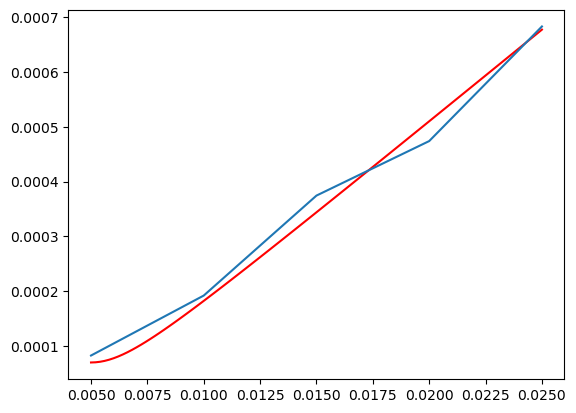

In [599]:
def expcloud(tofs,s0,T,to): return np.sqrt(s0*s0+(kb*T*(tofs-to)*(tofs-to))/msr88)
kb=1.380649e-23
msr88=1.459706901e-25
s0=70e-6
T=12e-6
to=5e-3
t=np.linspace(5e-3,25e-3,100)
plt.plot(t,expcloud(t,s0,T,to),color='red')
plt.plot(tofs,fwhmv)
plt.show()

[0.005 0.01  0.015 0.02  0.025]
[9.4e-05, 0.000205, 0.000373, 0.000478, 0.000627]
[[Model]]
    Model(expcloud)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 5
    # variables        = 3
    chi-square         = 7.0573e-10
    reduced chi-square = 3.5287e-10
    Akaike info crit   = -107.406122
    Bayesian info crit = -108.577808
    R-squared          = 0.99608052
[[Variables]]
    s0:  5.8932e-05 +/- 6.5721e-05 (111.52%) (init = 7e-05)
    T:   8.0648e-06 +/- 1.3403e-06 (16.62%) (init = 1.2e-05)
    to:  0.00242788 +/- 0.00168458 (69.39%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(T, to)  = +0.9598
    C(s0, to) = +0.9032
    C(s0, T)  = +0.8176


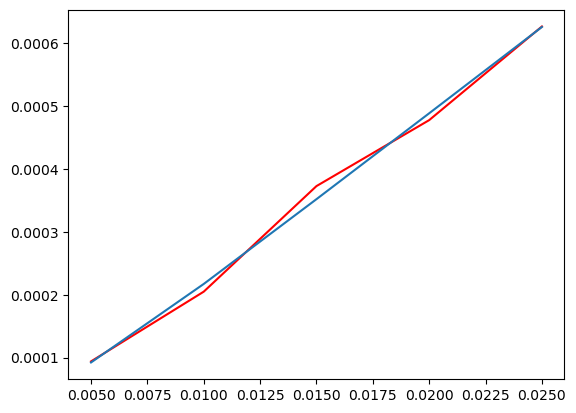

In [683]:
fwhmh=[0.000001, 0.000003, 0.000006, 0.000009, 0.000012]
fwhmh=[0.000094, 0.000205, 0.000373, 0.000478, 0.000627]
print(tofs)
print(fwhmh)
plt.plot(tofs,fwhmh,color='red')
out=mod.fit(fwhmh,tofs=tofs,params=params)
plt.plot(tofs,out.best_fit)
print(out.fit_report())


In [641]:
list=[9.39227356e-05,2.05032899e-04,3.73225371e-04,4.78044268e-04,6.27162899e-04]
list2=[]
for n in list:
    a= format(n, 'f')
    list2.append(a)
print(np.array(list2))    

['0.000094' '0.000205' '0.000373' '0.000478' '0.000627']
